### Edgar Moises Hernandez-Gonzalez
#### 03/04/20-04/04/20
#### Clasificacion de CIFAR10 con Fine Tuning usando VGG16
##### Esta es otra forma de hacer fine tuning
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 69.63%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
# las etiquetas en categorical para poder entrenar data augmentation
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [0]:
datagen_train = ImageDataGenerator(
	rotation_range=20, #10
	width_shift_range=0.2, #0.1
	height_shift_range=0.2, #0.1
	zoom_range=0.2, #0.15
	shear_range=0.2, #0.15
	horizontal_flip=True,
	fill_mode='nearest')

In [9]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [11]:
for layer in base_model.layers:
  layer.trainable = False

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f347d512cf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347cc99908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347cc99be0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f347c4753c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c475278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c4822e8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f347c48b780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c48b5f8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c494940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347004db00> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3470055a20> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
optimizer = Adam(lr=1e-4)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
# checar que onda con el data augmentation
# se hace dos veces o que onda
history = model.fit_generator(datagen_train.flow(x_train, y_train_categorical, batch_size=128),
                              steps_per_epoch=np.ceil(n_samples_train/128),
                              epochs=100,
                              validation_data=(x_test, y_test_categorical),
                              verbose=2)
# no se usa porque validation_data no es un generador
#validation_steps=np.ceil(n_samples_test/128)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
391/391 - 26s - loss: 2.1866 - accuracy: 0.2070 - val_loss: 1.9423 - val_accuracy: 0.3420
Epoch 2/100
391/391 - 25s - loss: 1.9368 - accuracy: 0.3143 - val_loss: 1.7447 - val_accuracy: 0.4109
Epoch 3/100
391/391 - 25s - loss: 1.8185 - accuracy: 0.3564 - val_loss: 1.6425 - val_accuracy: 0.4426
Epoch 4/100
391/391 - 25s - loss: 1.7459 - accuracy: 0.3843 - val_loss: 1.5722 - val_accuracy: 0.4645
Epoch 5/100
391/391 - 25s - loss: 1.6980 - accuracy: 0.4047 - val_loss: 1.5296 - val_accuracy: 0.4791
Epoch 6/100
391/391 - 25s - loss: 1.6596 - accuracy: 0.4153 - val_loss: 1.5016 - val_accuracy: 0.4828
Epoch 7/100
391/391 - 25s - loss: 1.6357 - accuracy: 0.4246 - val_loss: 1.4745 - val_accuracy: 0.4921
Epoch 8/100
391/391 - 27s - loss: 1.6110 - accuracy: 0.4344 - val_loss: 1.4550 - val_accuracy: 0.4981
Epoch 9/100
391/391 - 25s - loss: 1.5912 - accuracy: 0.4437 - val_loss: 1.4245 - val_accuracy: 0.5100
Epoch 

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 1.2276 - accuracy: 0.5694
Test loss: 1.2276484966278076
Test accuracy: 0.5694000124931335


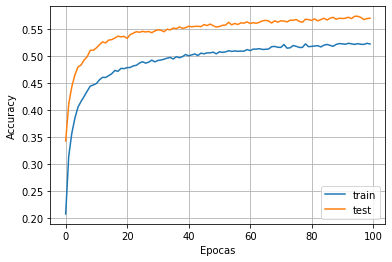

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

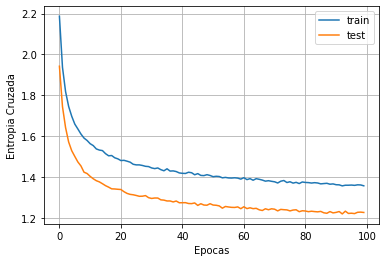

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [18]:
for layer in base_model.layers[15:]:
  layer.trainable = True

for layer in base_model.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f347d512cf8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347cc99908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347cc99be0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f347c4753c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c475278> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c4822e8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f347c48b780> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c48b5f8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347c494940> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f347004db00> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3470055a20> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
optimizer = Adam(lr=1e-6)
model.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
history = model.fit_generator(datagen_train.flow(x_train, y_train_categorical, batch_size=128),
                              steps_per_epoch=np.ceil(n_samples_train/128),
                              epochs=100,
                              validation_data=(x_test, y_test_categorical),
                              verbose=2)
# no se usa porque validation_data no es un generador
#validation_steps=np.ceil(n_samples_test/128)

Epoch 1/100
391/391 - 26s - loss: 1.3381 - accuracy: 0.5280 - val_loss: 1.1844 - val_accuracy: 0.5853
Epoch 2/100
391/391 - 26s - loss: 1.3100 - accuracy: 0.5406 - val_loss: 1.1718 - val_accuracy: 0.5886
Epoch 3/100
391/391 - 26s - loss: 1.2911 - accuracy: 0.5461 - val_loss: 1.1522 - val_accuracy: 0.5946
Epoch 4/100
391/391 - 26s - loss: 1.2713 - accuracy: 0.5533 - val_loss: 1.1351 - val_accuracy: 0.6038
Epoch 5/100
391/391 - 26s - loss: 1.2644 - accuracy: 0.5554 - val_loss: 1.1278 - val_accuracy: 0.6044
Epoch 6/100
391/391 - 26s - loss: 1.2487 - accuracy: 0.5616 - val_loss: 1.1103 - val_accuracy: 0.6113
Epoch 7/100
391/391 - 26s - loss: 1.2354 - accuracy: 0.5650 - val_loss: 1.0939 - val_accuracy: 0.6176
Epoch 8/100
391/391 - 26s - loss: 1.2337 - accuracy: 0.5698 - val_loss: 1.0965 - val_accuracy: 0.6168
Epoch 9/100
391/391 - 26s - loss: 1.2206 - accuracy: 0.5699 - val_loss: 1.0842 - val_accuracy: 0.6193
Epoch 10/100
391/391 - 26s - loss: 1.2150 - accuracy: 0.5709 - val_loss: 1.0779 - 

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.8724 - accuracy: 0.6963
Test loss: 0.8723649382591248
Test accuracy: 0.6963000297546387


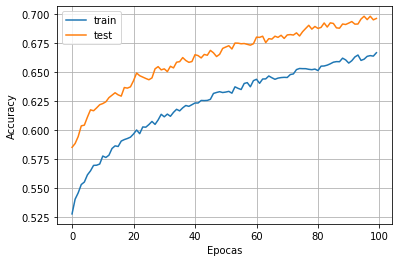

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

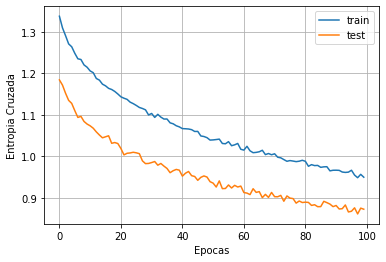

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [26]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[752  35  38   5   9   4  16  16  72  53]
 [  7 845   1   6   1   5   8   3  12 112]
 [ 50  26 567  40  77  44 141  32   8  15]
 [ 14  40  50 410  32 156 177  45  23  53]
 [ 20  13  50  27 553  23 188  93  17  16]
 [ 11  14  36 135  46 581  88  59   5  25]
 [  4   9  25  28  22  26 862   4   6  14]
 [  7  12  20  18  47  47  25 787   4  33]
 [ 55  73   9   7   5   4   6   6 782  53]
 [ 12 111   1   6   1   3  18   5  19 824]]


In [27]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1000
           1       0.72      0.84      0.78      1000
           2       0.71      0.57      0.63      1000
           3       0.60      0.41      0.49      1000
           4       0.70      0.55      0.62      1000
           5       0.65      0.58      0.61      1000
           6       0.56      0.86      0.68      1000
           7       0.75      0.79      0.77      1000
           8       0.82      0.78      0.80      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000

